**Installations**

In [106]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install skfeature-chappers

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Imports**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras 
from keras import layers

**Loading Datasets**

In [6]:
df = pd.read_csv("../Datasets/energy_efficiency.csv")

df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28


In [7]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


**Checking for duplicates**

In [8]:
df.duplicated().sum()

np.int64(0)

**Checking for missing values**

In [9]:
df.isna().sum()

relative_compactness         0
surface_area                 0
wall_area                    0
roof_area                    0
overall_height               0
orientation                  0
glazing_area                 0
glazing_area_distribution    0
heating_load                 0
cooling_load                 0
dtype: int64

This dataset is relatively clean out of box so not much cleaning is needed but there will be further feature engineering done if this dataset is reused again. It was kept similar this time to compare with Linear Regression.

**Define X and y -variables**

In [110]:
X = df.drop(["heating_load", "cooling_load"], axis=1)
y = df[["heating_load", "cooling_load"]]

**Correlation Matrix**

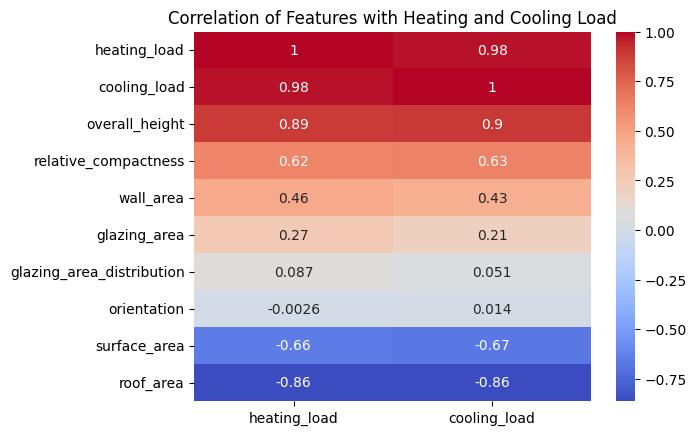

In [108]:
corr = df.corr()
sns.heatmap(corr[['heating_load', 'cooling_load']].sort_values(by='heating_load', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Heating and Cooling Load')
plt.show()

We can see that overall_height and roof area are the most influential features overall and orientation and glazing_area_distribution are negligible

**Fisher's score**

c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

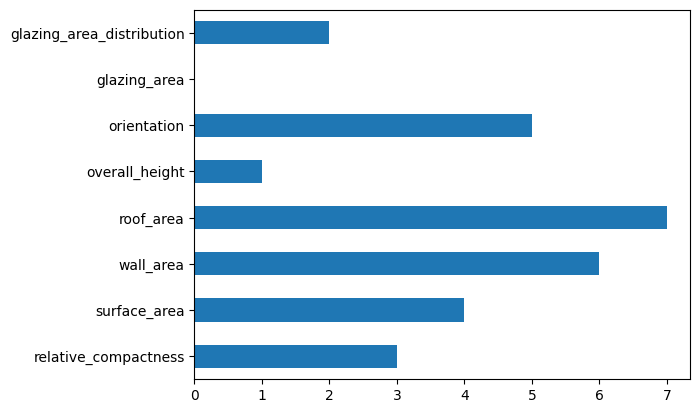

In [ ]:
from skfeature.function.similarity_based import fisher_score

ranks = fisher_score.fisher_score(X.values, y["heating_load"].values)
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

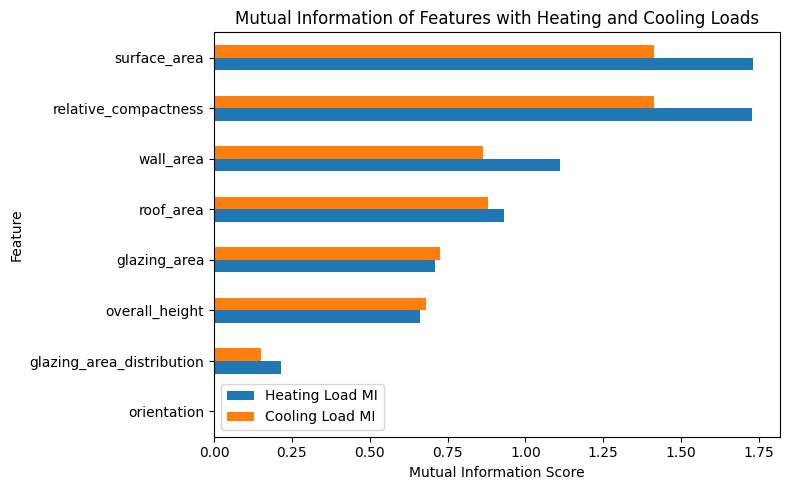

In [118]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_regression

# Compute Mutual Information for both targets
mi_heating = mutual_info_regression(X, y["heating_load"])
mi_cooling = mutual_info_regression(X, y["cooling_load"])

# Combine results into a DataFrame
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'Heating Load MI': mi_heating,
    'Cooling Load MI': mi_cooling
}).set_index('Feature')

# Sort by Heating Load MI (or average importance)
mi_df = mi_df.sort_values(by='Heating Load MI', ascending=True)

# Plot side-by-side horizontal bars
mi_df.plot(kind='barh', figsize=(8, 5))
plt.title('Mutual Information of Features with Heating and Cooling Loads')
plt.xlabel('Mutual Information Score')
plt.tight_layout()
plt.show()


c:\Users\stsaa\Desktop\Deep-Learning\.venv\Lib\site-packages\skfeature\function\similarity_based\fisher_score.py:59: RuntimeWarning: divide by zero encountered in divide
  score = 1.0 / lap_score - 1


<Axes: >

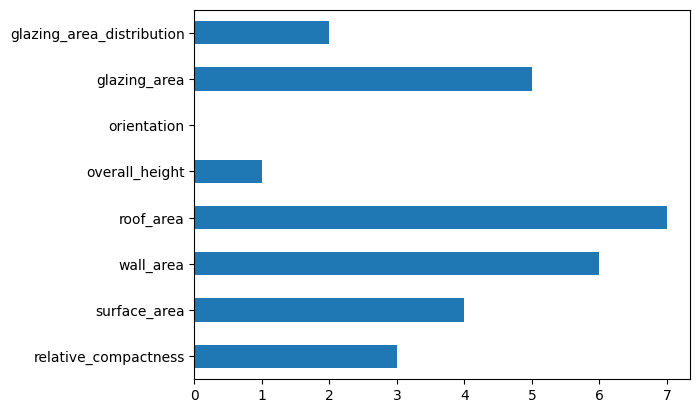

In [116]:
ranks = fisher_score.fisher_score(X.values, y["cooling_load"].values)
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

**train/test/validation -split**

In [44]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

**Neural Network**

In [53]:
input_shape = (X_train.shape[1],)

inputs = keras.Input(shape=input_shape)
x = layers.Dense(12, activation="relu")(inputs)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(16, activation="relu")(x)

heating_output = layers.Dense(1, name="heating_load")(x)
cooling_output = layers.Dense(1, name="cooling_load")(x)

model = keras.Model(inputs=inputs, outputs=[heating_output, cooling_output])

model.compile(optimizer="adam", loss="mse")
model.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 12)        │        108 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 32)        │        416 │ dense_32[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 16)        │        528 │ dense_33[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ heating_load        │ (None, 1)         │         17 │ dense_34[0][0]    │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cooling_load        │ (None, 1)         │         17 │ dense_34[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,086 (4.24 KB)

 Trainable params: 1,086 (4.24 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
model.fit(X_train, [y_train["heating_load"], y_train["cooling_load"]], epochs=1200, 
          validation_data=(X_val, [y_val["heating_load"], y_val["cooling_load"]])
)


Epoch 1/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - cooling_load_loss: 7.8464 - heating_load_loss: 8.4275 - loss: 16.2769 - val_cooling_load_loss: 5.8799 - val_heating_load_loss: 8.3122 - val_loss: 14.2719
Epoch 2/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 7.4712 - heating_load_loss: 8.1576 - loss: 15.7005 - val_cooling_load_loss: 5.8008 - val_heating_load_loss: 8.0072 - val_loss: 13.8715
Epoch 3/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 7.6101 - heating_load_loss: 8.3180 - loss: 15.8726 - val_cooling_load_loss: 5.6614 - val_heating_load_loss: 7.6506 - val_loss: 13.4034
Epoch 4/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 7.3561 - heating_load_loss: 8.0815 - loss: 15.4821 - val_cooling_load_loss: 5.8303 - val_heating_load_loss: 7.9888 - val_loss: 14.0856
Epoch 5/1200
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - cooling_load_loss: 7.3691 - heating_load_loss: 8.0777 - loss: 15.5263 - val_cooling_load_loss: 6.2172 - val_heatin

<Axes: >

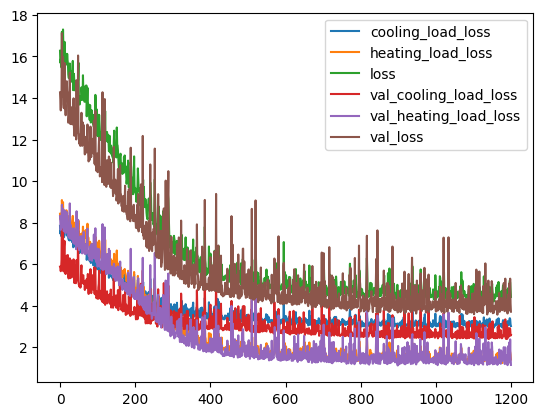

In [92]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [93]:
print("Test data evaluation:")
print(model.evaluate(X_test, [y_test["heating_load"], y_test["cooling_load"]], verbose=0))

print("\nTrain data evaluation:")
print(model.evaluate(X_train, [y_train["heating_load"], y_train["cooling_load"]], verbose=0))


Test data evaluation:
[3.7166335582733154, 1.0140085220336914, 2.8389387130737305]

Train data evaluation:
[4.08934211730957, 1.2095028162002563, 2.885244607925415]


In [94]:
test_predictions = model.predict(X_test)

heating_pred = test_predictions[0].flatten()
cooling_pred = test_predictions[1].flatten()

pred_df = pd.DataFrame({
    "True Heating Load": y_test["heating_load"].values,
    "Pred Heating Load": heating_pred,
    "True Cooling Load": y_test["cooling_load"].values,
    "Pred Cooling Load": cooling_pred
})

pred_df.head()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,True Heating Load,Pred Heating Load,True Cooling Load,Pred Cooling Load
0,10.08,10.378269,13.20,13.793634
1,10.78,10.623758,14.18,13.815828
2,11.22,11.427614,14.65,14.992698
3,34.72,36.723866,38.79,37.883934
4,24.03,24.370014,25.88,26.776649


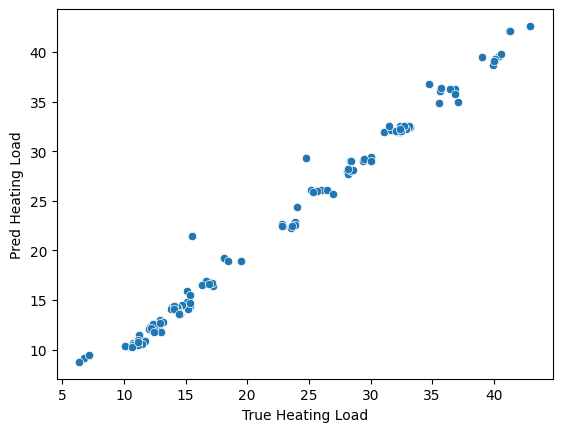

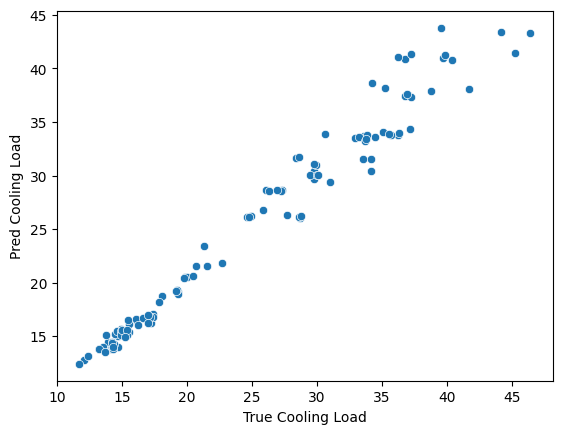

In [95]:
sns.scatterplot(x='True Heating Load', y='Pred Heating Load', data=pred_df)
plt.show()
sns.scatterplot(x='True Cooling Load', y='Pred Cooling Load', data=pred_df)
plt.show()

In [96]:
from sklearn import metrics
import numpy as np

heating_true = y_test["heating_load"].values
cooling_true = y_test["cooling_load"].values
heating_pred = test_predictions[0].flatten()
cooling_pred = test_predictions[1].flatten()

print("Heating Load Metrics:")
print("MAE:", round(metrics.mean_absolute_error(heating_true, heating_pred), 2))
print("MSE:", round(metrics.mean_squared_error(heating_true, heating_pred), 2))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(heating_true, heating_pred)), 2))
print("R²:", round(metrics.r2_score(heating_true, heating_pred), 2))
print("Explained Variance:", round(metrics.explained_variance_score(heating_true, heating_pred), 2))

print("\nCooling Load Metrics:")
print("MAE:", round(metrics.mean_absolute_error(cooling_true, cooling_pred), 2))
print("MSE:", round(metrics.mean_squared_error(cooling_true, cooling_pred), 2))
print("RMSE:", round(np.sqrt(metrics.mean_squared_error(cooling_true, cooling_pred)), 2))
print("R²:", round(metrics.r2_score(cooling_true, cooling_pred), 2))
print("Explained Variance:", round(metrics.explained_variance_score(cooling_true, cooling_pred), 2))


Heating Load Metrics:
MAE: 0.66
MSE: 1.05
RMSE: 1.02
R²: 0.99
Explained Variance: 0.99

Cooling Load Metrics:
MAE: 1.15
MSE: 2.67
RMSE: 1.63
R²: 0.97
Explained Variance: 0.97


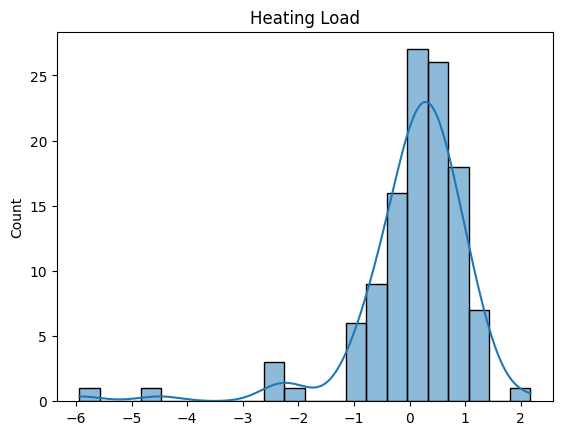

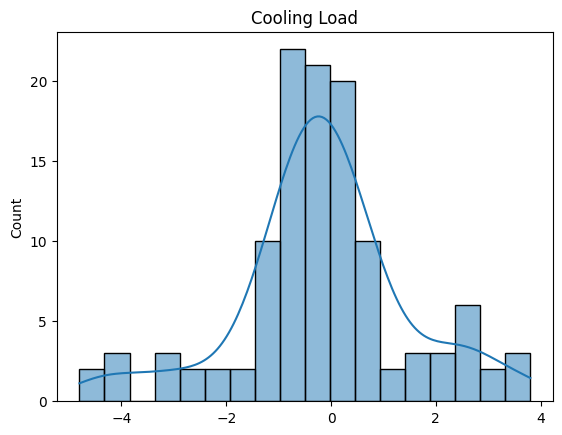

In [97]:
sns.histplot(heating_true - heating_pred, kde=True)
plt.title("Heating Load")
plt.show()

sns.histplot(cooling_true - cooling_pred, kde=True)
plt.title("Cooling Load")
plt.show()

In [98]:
df.tail()


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5.0,0.4,5.0,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2.0,0.4,5.0,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3.0,0.4,5.0,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4.0,0.4,5.0,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5.0,0.4,5.0,16.64,16.03


In [99]:
tester_row = {
    'relative_compactness': 0.64,
    'surface_area': 784.0,
    'wall_area': 343.0,
    'roof_area': 220.5,
    'overall_height': 3.5,
    'orientation': 5.0,
    'glazing_area': 0.4,
    'glazing_area_distribution': 5.0
}

tester_row = pd.DataFrame([tester_row])


In [100]:
import pandas as pd
import numpy as np

# Ensure numeric types
tester_row = tester_row.astype(np.float32)

# Make prediction
result = model.predict(tester_row)

# Extract both outputs
heating_load = result[0][0][0]
cooling_load = result[1][0][0]

print(f"Predicted Heating Load: {heating_load:.2f}")
print(f"Predicted Cooling Load: {cooling_load:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted Heating Load: 19.18
Predicted Cooling Load: 21.49


In [102]:
model.save("ann_regression_model.keras")